<a href="https://colab.research.google.com/github/AnuragRaj11/IIT-KGP-Hackathon/blob/main/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score)
from imblearn.over_sampling import SMOTE
import shap

In [8]:
df = pd.read_excel("dataset_excavate.xlsx")


In [9]:
print(df.columns.tolist())

['functional group', 'A', 'A_OS', "A'", "A'_OS", 'A_HOMO-', 'A_HOMO+', 'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A_X-', 'A_X+', 'A_Z_radii-', 'A_Z_radii+', 'A_e_affin-', 'A_e_affin+', 'Bi', 'B_OS', "B'", "B'_OS", 'B_HOMO-', 'B_HOMO+', 'B_IE-', 'B_IE+', 'B_LUMO-', 'B_LUMO+', 'B_X-', 'B_X+', 'B_Z_radii-', 'B_Z_radii+', 'B_e_affin-', 'B_e_affin+', 'PBE band gap', 'μ', 'μĀ', 'μ𝐵\xa0̅', 't']


In [10]:
df['insulator'] = (df['PBE band gap'] >= 0.5).astype(int)  # Create binary target for classification

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in num_cols if col not in ['PBE band gap', 'insulator'] ]

# Task 1 Binary Classification

In [12]:
X_class = df[features]
y_class = df['insulator']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf = XGBClassifier()
clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred = clf.predict(X_test_scaled)

In [17]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.9146459747817652
Confusion Matrix:
 [[662  32]
 [ 56 281]]


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  pl.tight_layout()


Text(0.5, 1.0, 'Classification Feature Importance')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


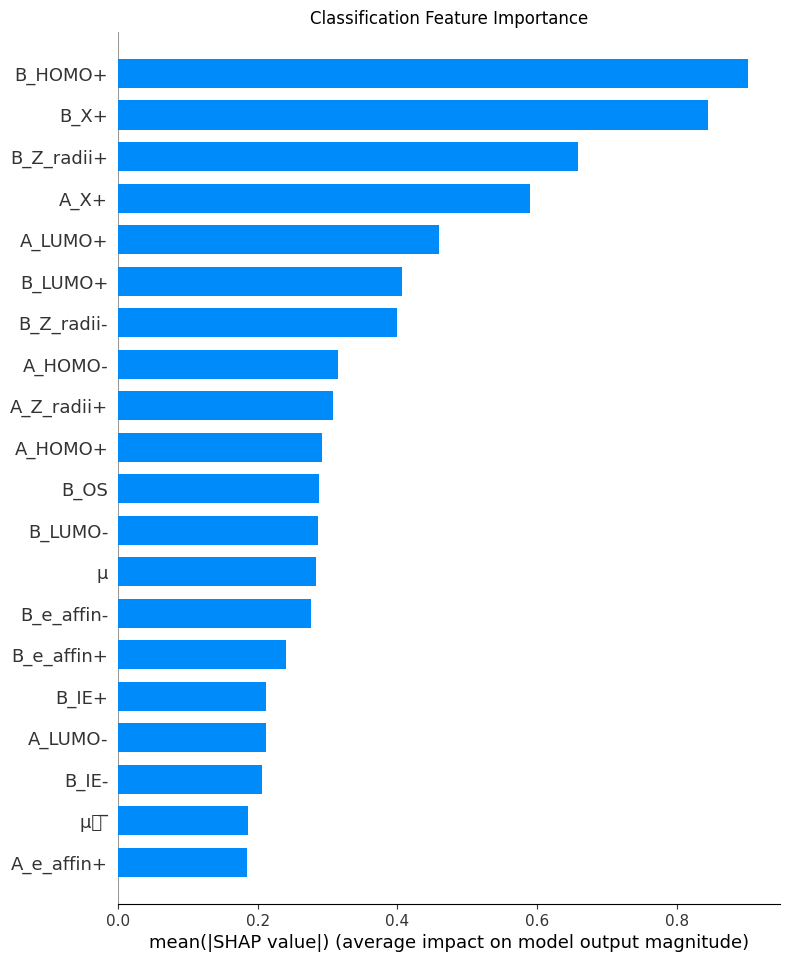

In [30]:
import shap
import matplotlib.pyplot as plt
explainer_clf = shap.TreeExplainer(clf)
shap_values_clf = explainer_clf.shap_values(X_test_scaled)
shap.summary_plot(shap_values_clf, X_test_scaled, feature_names=features, plot_type="bar", show=False)
plt.title("Classification Feature Importance")

## Task 2 Regression on Insulators Only

In [18]:
df_insulators = df[df['insulator'] == 1]
X_reg = df_insulators[features]
y_reg = df_insulators['PBE band gap']

In [19]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [20]:
scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

In [21]:
reg = XGBRegressor()
reg.fit(X_reg_train_scaled, y_reg_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
y_reg_pred = reg.predict(X_reg_test_scaled)

In [24]:
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
print("Regression RMSE:", rmse)

Regression RMSE: 0.3495483492313438


In [26]:
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
print("Regression RMSE:", rmse)
print("Regression R²:", r2_score(y_reg_test, y_reg_pred))

Regression RMSE: 0.3495483492313438
Regression R²: 0.8033375479700346


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


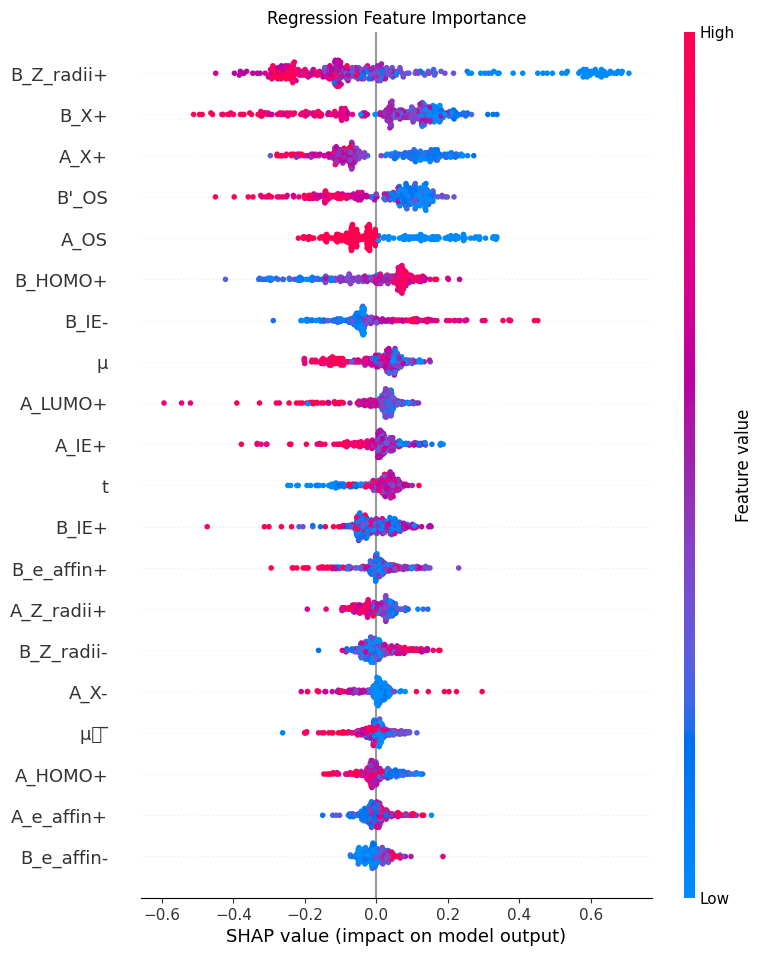

In [31]:
explainer_reg = shap.TreeExplainer(reg)
shap_values_reg = explainer_reg.shap_values(X_reg_test_scaled)
shap.summary_plot(shap_values_reg, X_reg_test_scaled, feature_names=features, plot_type="dot", show=False)
plt.title("Regression Feature Importance")
plt.show()